In [1]:
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
io = NWBHDF5IO('/home/samnt/Projects/Data/t0/2022-12-14/RawData/NWB/t0_221214T1632_test_CAR.nwb', 'r')
nwb = io.read()

/home/samnt/lib/miniconda3/envs/rt/lib/python3.8/site-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


`thresholdExtraction` expects inputs and writes outputs shaped as `num_channels x timesteps`, but `exportNWB` concatenates along the first dimension. So the code block below swaps those around.

In [2]:
nch = 128
numsamps = 30

fgtimepoints = int(np.prod(nwb.acquisition['func_generator'].data.shape)/nch)
fgdata = np.zeros((fgtimepoints, nch), dtype=nwb.acquisition['func_generator'].data.dtype)
chcount = 0
sampcount = 0
while sampcount < fgtimepoints:
    fgdata[sampcount:sampcount+numsamps, :] = nwb.acquisition['func_generator'].data[chcount:chcount+nch, :].T
    sampcount += numsamps
    chcount += nch

filttimepoints = int(np.prod(nwb.acquisition['test_node_filt'].data.shape)/nch)
filtdata = np.zeros((filttimepoints, nch), dtype=nwb.acquisition['test_node_filt'].data.dtype)
chcount = 0
sampcount = 0
while sampcount < filttimepoints:
    filtdata[sampcount:sampcount+numsamps, :] = nwb.acquisition['test_node_filt'].data[chcount:chcount+nch, :].T
    sampcount += numsamps
    chcount += nch

Plot raw and filtered data

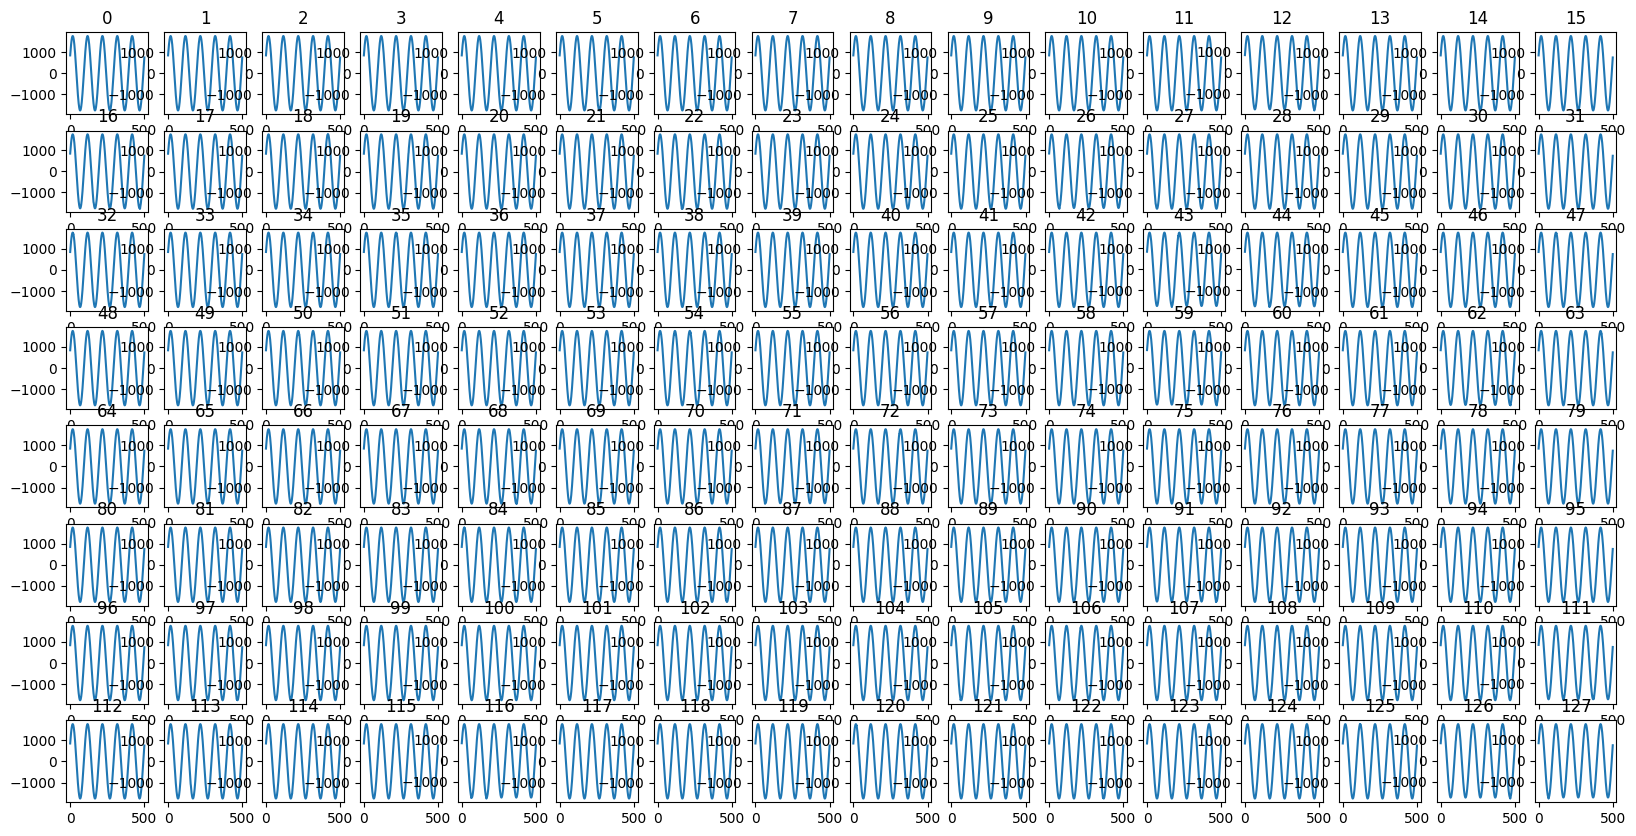

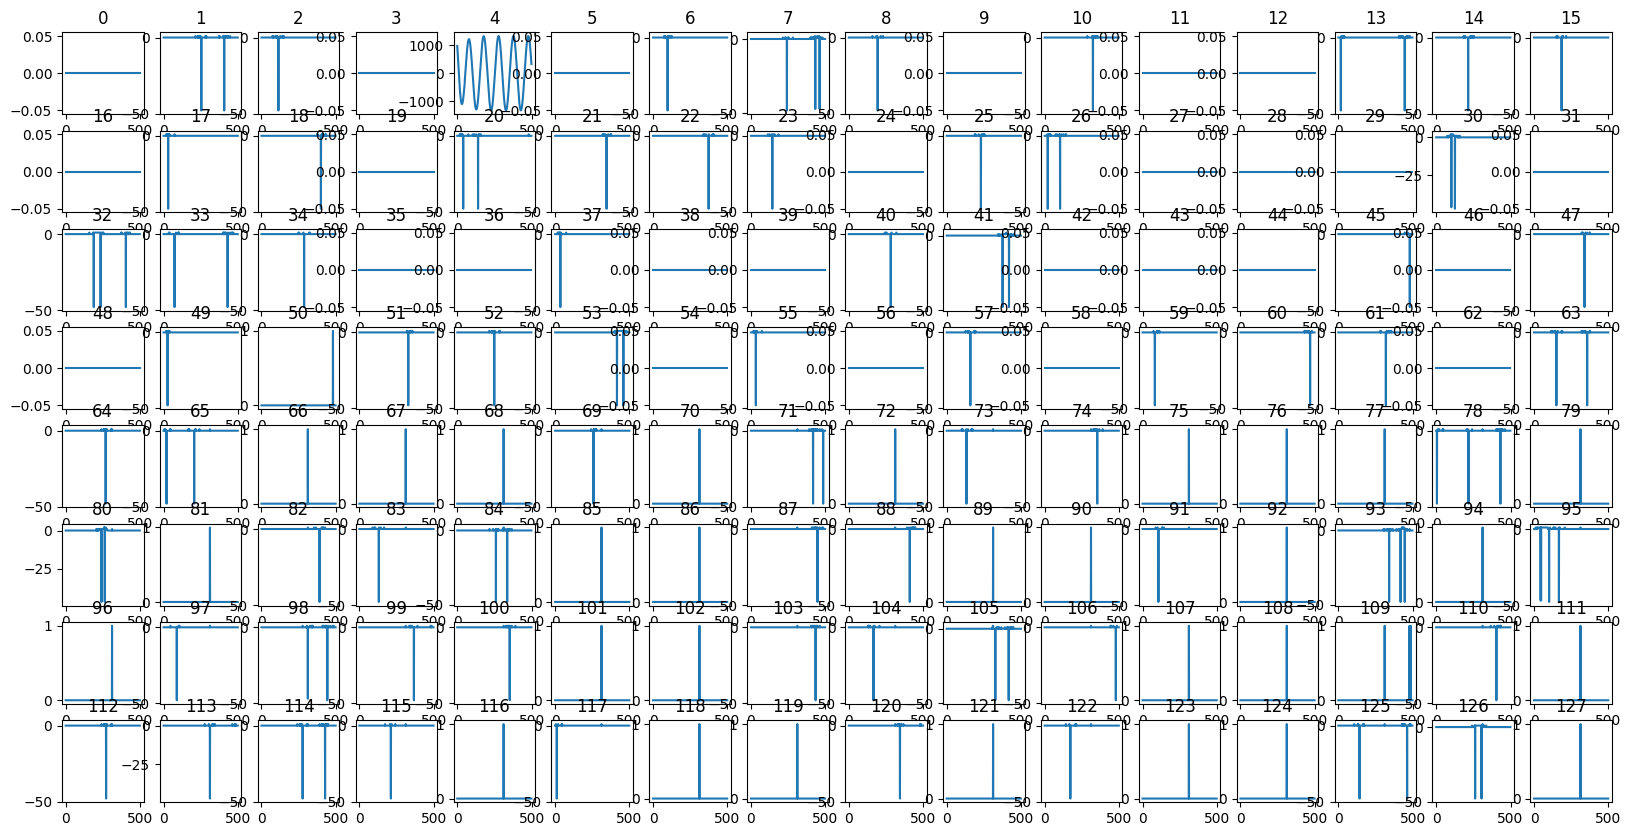

In [4]:
fig1, ax1 = plt.subplots(8,16)
fig1.set_size_inches(20, 10)
fig2, ax2 = plt.subplots(8,16)
fig2.set_size_inches(20, 10)
for a1, a2, c in zip(ax1.reshape(-1), ax2.reshape(-1), range(fgdata.shape[1])):
    a1.plot(fgdata[:500, c])
    a1.set_title(c)
    a2.plot(filtdata[:500, c])
    a2.set_title(c)

Print spike times and plot the corresponding filtered data. Note, we add ~2.1 to the timestamps because spiketimes are calculated relative to startGraph but we don't have filtered data until after thresholds are calculated.

array([2.154, 2.176, 2.18 , 2.183, 2.184, 2.188, 2.202, 2.224, 2.231,
       2.232, 2.277, 2.287, 2.337, 2.342, 2.389, 2.424, 2.438, 2.466,
       2.472, 2.517, 2.531, 2.625, 2.698, 2.723, 2.735, 2.745, 2.764,
       2.767, 2.775, 2.778, 2.789, 2.808, 2.816, 2.818, 2.824, 2.826,
       2.85 , 2.858, 2.867, 2.891, 2.908, 2.912, 2.924, 2.953, 2.963,
       2.966])

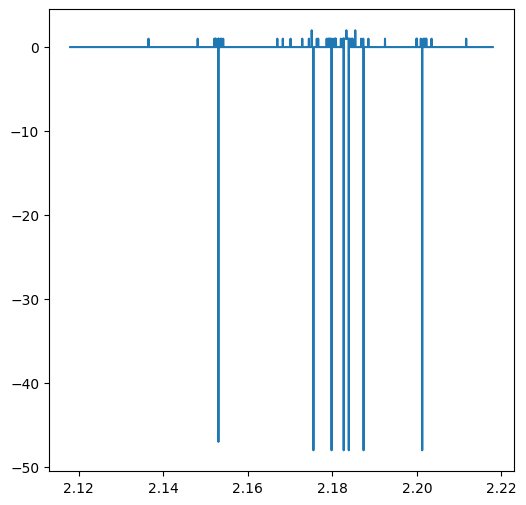

In [13]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.plot(np.arange(0,3000)/30000+2.118, filtdata[:3000,0])
nwb.units['spike_times'][0]